## import

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import datetime as dt

%matplotlib inline
 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [112]:
plt.style.use('fivethirtyeight') 

## read in data

In [113]:
orders = pd.read_csv('data/Orders.csv', dayfirst=True, header=1)
process = pd.read_csv('data/Order Process.csv', dayfirst=True)
intern = pd.read_csv('data/Intern.csv', dayfirst=True)
campaign = pd.read_csv('data/Campaign.csv', dayfirst=True)

## make columns more pythonic

In [114]:
orders.rename(columns=lambda x : x.lower(), inplace=True)
orders.rename(columns=lambda x : x.replace(' ', '_'), inplace=True)
orders.rename(columns=lambda x : x.replace('/', '_'), inplace=True)
process.rename(columns=lambda x : x.lower(), inplace=True)
process.rename(columns=lambda x : x.replace(' ', '_'), inplace=True)
intern.rename(columns=lambda x : x.lower(), inplace=True)
intern.rename(columns=lambda x : x.replace(' ', '_'), inplace=True)
campaign.rename(columns=lambda x : x.lower(), inplace=True)
campaign.rename(columns=lambda x : x.replace(' ', '_'), inplace=True)

## replace duplicates

In [115]:
orders[orders.duplicated(keep=False)]

,index,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,country_region,city,state,postal_code,region,category,sub-category,product_id,sales,quantity,discount,profit


In [116]:
campaign.drop(columns='customer_name', inplace=True)
campaign[campaign.duplicated(keep=False)]

,order_id,arrival_scan_date


In [117]:
intern[intern.duplicated(keep=False)].sort_values(by='order_id').head()

,order_id,ready_to_ship_date,pickup_date
78,CA-2019-100244,24/09/2019,25/09/2019
79,CA-2019-100244,24/09/2019,25/09/2019
80,CA-2019-100244,24/09/2019,25/09/2019
82,CA-2019-100244,24/09/2019,25/09/2019
83,CA-2019-100244,24/09/2019,25/09/2019


In [118]:
intern.drop_duplicates(inplace=True)
intern[intern.duplicated(keep=False)].sort_values(by='order_id').head()

,order_id,ready_to_ship_date,pickup_date


# convert to datetime

In [119]:
campaign['arrival_scan_date'] = pd.to_datetime(campaign['arrival_scan_date'], dayfirst=True, format='%d/%m/%Y')
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_id           333 non-null    object        
 1   arrival_scan_date  333 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 5.3+ KB


In [120]:
intern['ready_to_ship_date'] = pd.to_datetime(intern['ready_to_ship_date'], dayfirst=True, format='%d/%m/%Y')
intern['pickup_date'] = pd.to_datetime(intern['pickup_date'], dayfirst=True, format='%d/%m/%Y')
intern.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 0 to 289
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            204 non-null    object        
 1   ready_to_ship_date  204 non-null    datetime64[ns]
 2   pickup_date         204 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 6.4+ KB


In [121]:
orders['order_date'] = pd.to_datetime(orders['order_date'], dayfirst=True, format='%d/%m/%Y')
orders['order_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9994 entries, 0 to 9993
Series name: order_date
Non-Null Count  Dtype         
--------------  -----         
9994 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 78.2 KB


In [122]:
process.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5899 entries, 0 to 5898
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   row_id              5899 non-null   int64 
 1   order_id            5899 non-null   object
 2   order_date          5899 non-null   object
 3   on_truck_scan_date  5899 non-null   object
 4   ship_mode           5899 non-null   object
dtypes: int64(1), object(4)
memory usage: 230.6+ KB


In [123]:
process['order_date'] = pd.to_datetime(process['order_date'], dayfirst=True, format='%d/%m/%Y')
process['on_truck_scan_date'] = pd.to_datetime(process['on_truck_scan_date'], dayfirst=True, format='%d/%m/%Y')
process.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5899 entries, 0 to 5898
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   row_id              5899 non-null   int64         
 1   order_id            5899 non-null   object        
 2   order_date          5899 non-null   datetime64[ns]
 3   on_truck_scan_date  5899 non-null   datetime64[ns]
 4   ship_mode           5899 non-null   object        
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 230.6+ KB


# drop columns

In [124]:
orders.head(1)

,index,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,country_region,city,state,postal_code,region,category,sub-category,product_id,sales,quantity,discount,profit
0,27,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.57,3,0.0,11.7741


In [125]:
new_orders = orders[['order_id','order_date', 'postal_code']]
new_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   order_id     9994 non-null   object        
 1   order_date   9994 non-null   datetime64[ns]
 2   postal_code  9983 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 234.4+ KB


# drop duplicates (again)

In [126]:
new_orders[new_orders.duplicated(keep=False)].sort_values(by='order_id').head(4)

,order_id,order_date,postal_code
6507,CA-2017-100090,2017-07-08,94122.0
8069,CA-2017-100090,2017-07-08,94122.0
2644,CA-2017-100363,2017-04-08,85301.0
1173,CA-2017-100363,2017-04-08,85301.0


In [127]:
new_orders.drop_duplicates(inplace=True)

/var/folders/fx/68v6pyq933dgzgdtm5mvk8l40000gn/T/ipykernel_1104/2612034566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_orders.drop_duplicates(inplace=True)


In [128]:
new_orders[new_orders.duplicated(keep=False)]

,order_id,order_date,postal_code


In [129]:
new_orders[(new_orders['order_id'] == 'CA-2017-100090')]

,order_id,order_date,postal_code
6507,CA-2017-100090,2017-07-08,94122.0


In [130]:
new_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5009 entries, 0 to 9988
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   order_id     5009 non-null   object        
 1   order_date   5009 non-null   datetime64[ns]
 2   postal_code  5003 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 156.5+ KB


# KPIs

### merge campaign & new_orders

In [131]:
campaign.head(2)

,order_id,arrival_scan_date
0,CA-2019-109666,2019-05-03
1,CA-2019-138933,2019-05-03


In [132]:
new_orders.head(2)

,order_id,order_date,postal_code
0,CA-2019-121755,2019-01-16,90049.0
1,CA-2019-118255,2019-03-11,55122.0


In [133]:
df1 = new_orders.merge(campaign, on='order_id')   
df1.head(2)

,order_id,order_date,postal_code,arrival_scan_date
0,CA-2019-145625,2019-09-11,92037.0,2019-09-23
1,CA-2019-162138,2019-04-23,92345.0,2019-05-06


In [134]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 332
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_id           333 non-null    object        
 1   order_date         333 non-null    datetime64[ns]
 2   postal_code        333 non-null    float64       
 3   arrival_scan_date  333 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 13.0+ KB


## total waiting (arrival_scan_date - order_date)

In [135]:
# df1 = new_orders.merge(campaign, on='order_id')   
df1['total_waiting'] =  df1['arrival_scan_date'] - df1['order_date']
df1.head()

,order_id,order_date,postal_code,arrival_scan_date,total_waiting
0,CA-2019-145625,2019-09-11,92037.0,2019-09-23,12 days
1,CA-2019-162138,2019-04-23,92345.0,2019-05-06,13 days
2,CA-2019-169166,2019-05-09,98115.0,2019-05-20,11 days
3,CA-2020-131954,2020-01-21,98115.0,2020-02-03,13 days
4,CA-2019-102981,2019-09-06,10035.0,2019-09-16,10 days


In [136]:
df1.describe()

,postal_code,total_waiting
count,333.000000,333
mean,57633.351351,10 days 20:02:09.729729729
std,31836.257226,2 days 20:41:39.045324279
min,1752.000000,3 days 00:00:00
25%,31088.000000,9 days 00:00:00
50%,60653.000000,11 days 00:00:00
75%,90032.000000,13 days 00:00:00
max,98270.000000,17 days 00:00:00


In [137]:
#df1['total_waiting'] = df1['total_waiting'].apply(lambda x: x.value)

In [138]:
df1['total_waiting'] = df1['total_waiting'].dt.days

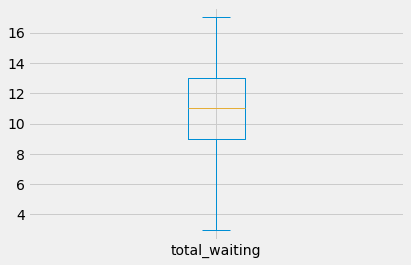

In [139]:
df1[['total_waiting']].plot(kind='box');

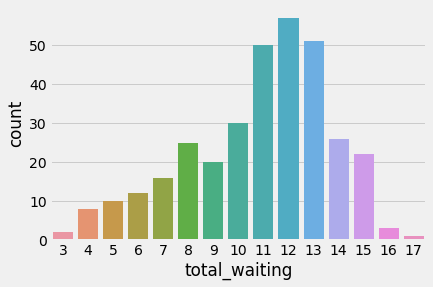

In [140]:
sns.countplot(data= df1, x = 'total_waiting');

## total processing time (within the company) = on_truck_scan_date - order_date

In [141]:
# process_time = on_truck_scan_date - order_date
process['total_processing'] =  process['on_truck_scan_date'] - process['order_date']
process.head(2)

,row_id,order_id,order_date,on_truck_scan_date,ship_mode,total_processing
0,3074,CA-2019-125206,2019-01-03,2019-01-07,Express,4 days
1,4919,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,7 days


In [142]:
# converting the timedelta to days
process['total_processing'] = process['total_processing'].dt.days

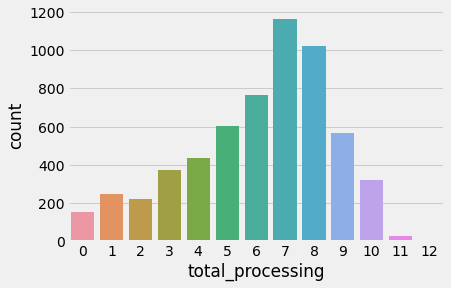

In [143]:
sns.countplot(data= process, x = 'total_processing');

## process_time = order-date - ready to ship

In [144]:
intern.head(2)

,order_id,ready_to_ship_date,pickup_date
0,CA-2019-116540,2019-09-02,2019-09-03
2,CA-2019-129847,2019-09-04,2019-09-04


In [145]:
df2 = new_orders.merge(intern, on='order_id') 
df2.head(2)  

,order_id,order_date,postal_code,ready_to_ship_date,pickup_date
0,CA-2020-119004,2020-11-23,28205.0,2020-11-30,2020-12-02
1,CA-2019-145625,2019-09-11,92037.0,2019-09-17,2019-09-18


In [146]:
df2['process_time'] =  df2['ready_to_ship_date'] - df2['order_date']
df2.head(2)

,order_id,order_date,postal_code,ready_to_ship_date,pickup_date,process_time
0,CA-2020-119004,2020-11-23,28205.0,2020-11-30,2020-12-02,7 days
1,CA-2019-145625,2019-09-11,92037.0,2019-09-17,2019-09-18,6 days


In [147]:
df2.describe()

,postal_code,process_time
count,204.000000,204
mean,55576.779412,4 days 04:14:07.058823529
std,31647.282103,1 days 23:16:29.025426269
min,2149.000000,0 days 00:00:00
25%,28005.000000,3 days 00:00:00
50%,55407.000000,4 days 00:00:00
75%,90036.000000,6 days 00:00:00
max,98632.000000,8 days 00:00:00


In [148]:
df2['process_time'] = df2['process_time'].dt.days

In [149]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 0 to 203
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            204 non-null    object        
 1   order_date          204 non-null    datetime64[ns]
 2   postal_code         204 non-null    float64       
 3   ready_to_ship_date  204 non-null    datetime64[ns]
 4   pickup_date         204 non-null    datetime64[ns]
 5   process_time        204 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(1), object(1)
memory usage: 11.2+ KB


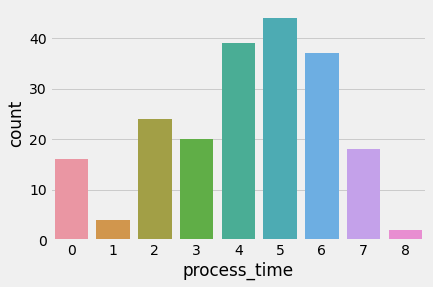

In [150]:
sns.countplot(data= df2, x = 'process_time');

# merge new_orders with intern

In [151]:
new_orders.head(1)

,order_id,order_date,postal_code
0,CA-2019-121755,2019-01-16,90049.0


In [152]:
intern.head(1)

,order_id,ready_to_ship_date,pickup_date
0,CA-2019-116540,2019-09-02,2019-09-03


In [153]:
# on_truck_scan_date - ready_to_ship
df3 = new_orders.merge(intern, on='order_id')   
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 0 to 203
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            204 non-null    object        
 1   order_date          204 non-null    datetime64[ns]
 2   postal_code         204 non-null    float64       
 3   ready_to_ship_date  204 non-null    datetime64[ns]
 4   pickup_date         204 non-null    datetime64[ns]
dtypes: datetime64[ns](3), float64(1), object(1)
memory usage: 9.6+ KB


In [154]:
df3.head(1)

,order_id,order_date,postal_code,ready_to_ship_date,pickup_date
0,CA-2020-119004,2020-11-23,28205.0,2020-11-30,2020-12-02


In [155]:
df3['inhouse_delay'] = df3['pickup_date'] - df3['ready_to_ship_date']
df3.head(1)

,order_id,order_date,postal_code,ready_to_ship_date,pickup_date,inhouse_delay
0,CA-2020-119004,2020-11-23,28205.0,2020-11-30,2020-12-02,2 days


In [156]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 0 to 203
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   order_id            204 non-null    object         
 1   order_date          204 non-null    datetime64[ns] 
 2   postal_code         204 non-null    float64        
 3   ready_to_ship_date  204 non-null    datetime64[ns] 
 4   pickup_date         204 non-null    datetime64[ns] 
 5   inhouse_delay       204 non-null    timedelta64[ns]
dtypes: datetime64[ns](3), float64(1), object(1), timedelta64[ns](1)
memory usage: 11.2+ KB


# inhouse_delay = pickup_date - ready_to_ship_date

In [157]:
df3.describe()

,postal_code,inhouse_delay
count,204.000000,204
mean,55576.779412,1 days 13:45:52.941176470
std,31647.282103,0 days 22:50:34.321824212
min,2149.000000,0 days 00:00:00
25%,28005.000000,1 days 00:00:00
50%,55407.000000,2 days 00:00:00
75%,90036.000000,2 days 00:00:00
max,98632.000000,3 days 00:00:00


In [158]:
df3['inhouse_delay'] = df3['inhouse_delay'].dt.days

In [159]:
df3.shape

(204, 6)

In [160]:
df3.query('inhouse_delay == 3').count()

order_id              34
order_date            34
postal_code           34
ready_to_ship_date    34
pickup_date           34
inhouse_delay         34
dtype: int64

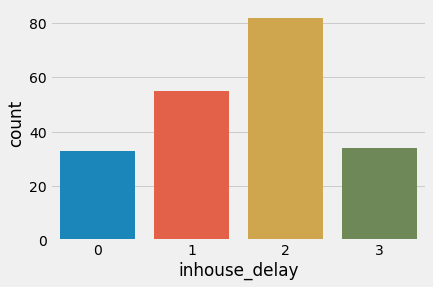

In [161]:
sns.countplot(data= df3, x = 'inhouse_delay');

In [162]:
df4 = df2
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 0 to 203
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            204 non-null    object        
 1   order_date          204 non-null    datetime64[ns]
 2   postal_code         204 non-null    float64       
 3   ready_to_ship_date  204 non-null    datetime64[ns]
 4   pickup_date         204 non-null    datetime64[ns]
 5   process_time        204 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(1), object(1)
memory usage: 11.2+ KB


In [163]:
df4['order_date'] = df4['order_date'].dt.day_name()
df4.head()

,order_id,order_date,postal_code,ready_to_ship_date,pickup_date,process_time
0,CA-2020-119004,Monday,28205.0,2020-11-30,2020-12-02,7
1,CA-2019-145625,Wednesday,92037.0,2019-09-17,2019-09-18,6
2,CA-2020-135307,Thursday,64118.0,2020-11-27,2020-11-27,1
3,CA-2019-102981,Friday,10035.0,2019-09-09,2019-09-11,3
4,US-2020-155425,Tuesday,85705.0,2020-11-11,2020-11-12,1


In [164]:
df4.describe()

,postal_code,process_time
count,204.000000,204.000000
mean,55576.779412,4.176471
std,31647.282103,1.969780
min,2149.000000,0.000000
25%,28005.000000,3.000000
50%,55407.000000,4.000000
75%,90036.000000,6.000000
max,98632.000000,8.000000


In [165]:
df4.head(1)

,order_id,order_date,postal_code,ready_to_ship_date,pickup_date,process_time
0,CA-2020-119004,Monday,28205.0,2020-11-30,2020-12-02,7


In [166]:
df5 = df4.merge(process, on='order_id') 
df5.head()

,order_id,order_date_x,postal_code,ready_to_ship_date,pickup_date,process_time,row_id,order_date_y,on_truck_scan_date,ship_mode,total_processing
0,CA-2020-119004,Monday,28205.0,2020-11-30,2020-12-02,7,107,2020-11-23,2020-12-02,Standard Processing,9
1,CA-2020-119004,Monday,28205.0,2020-11-30,2020-12-02,7,108,2020-11-23,2020-12-02,Standard Processing,9
2,CA-2020-119004,Monday,28205.0,2020-11-30,2020-12-02,7,109,2020-11-23,2020-12-02,Standard Processing,9
3,CA-2019-145625,Wednesday,92037.0,2019-09-17,2019-09-18,6,251,2019-09-11,2019-09-18,Standard Processing,7
4,CA-2019-145625,Wednesday,92037.0,2019-09-17,2019-09-18,6,252,2019-09-11,2019-09-18,Standard Processing,7


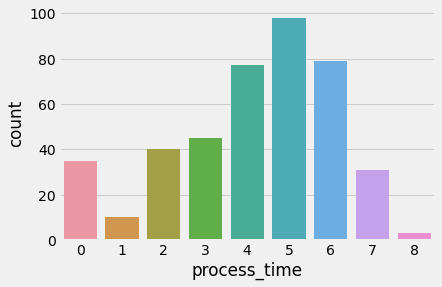

In [167]:
sns.countplot(data= df5, x = 'process_time');

In [168]:
#plt.figure(figsize=(15,8))
#sns.barplot(x=df5["order_date_x"], y = df5['process_time']);

In [169]:

df6 = pd.DataFrame(df5, columns = ['order_id', 'order_date_x', 'process_time', 'on_truck_scan_date', 'ship_mode', 'total_processing']) 

process_time_soll = [] 
for day in df6["order_date_x"]:
    
    if day == 'Monday' or 'Tuesday' or 'Wednesday' or 'Thursday' and df6["ship_mode"] == 'Express': 
        process_time_soll.append(1) 
    elif day == 'Friday' or 'Saturday': 
        process_time_soll.append(3) 
    elif day == 'Sunday': 
        process_time_soll.append(3)

df6["process_time_soll"] = process_time_soll  
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            418 non-null    object        
 1   order_date_x        418 non-null    object        
 2   process_time        418 non-null    int64         
 3   on_truck_scan_date  418 non-null    datetime64[ns]
 4   ship_mode           418 non-null    object        
 5   total_processing    418 non-null    int64         
 6   process_time_soll   418 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 26.1+ KB


In [170]:
#df6["process_time_soll_new"] = df6.apply(lambda x: x['process_time_soll'] + 1 if x['ship_mode'] == 'Standard Processing' else 0)

In [171]:
#df6["process_time_soll_new"] = df6[['process_time_soll', 'ship_mode']].apply(lambda x: x['process_time_soll'] + 1 if x['ship_mode'] == 'Standard Processing' else 0)

In [172]:
df6.head()

,order_id,order_date_x,process_time,on_truck_scan_date,ship_mode,total_processing,process_time_soll
0,CA-2020-119004,Monday,7,2020-12-02,Standard Processing,9,1
1,CA-2020-119004,Monday,7,2020-12-02,Standard Processing,9,1
2,CA-2020-119004,Monday,7,2020-12-02,Standard Processing,9,1
3,CA-2019-145625,Wednesday,6,2019-09-18,Standard Processing,7,1
4,CA-2019-145625,Wednesday,6,2019-09-18,Standard Processing,7,1


In [173]:
#plt.figure(figsize=(15,8))
#sns.barplot(x=df6["order_date_x"], y = df6['process_time_soll']);

In [174]:
df6.query('ship_mode == "Express"')

,order_id,order_date_x,process_time,on_truck_scan_date,ship_mode,total_processing,process_time_soll
5,CA-2020-135307,Thursday,1,2020-11-27,Express,1,1
6,CA-2020-135307,Thursday,1,2020-11-27,Express,1,1
9,US-2020-155425,Tuesday,1,2020-11-12,Express,2,1
10,US-2020-155425,Tuesday,1,2020-11-12,Express,2,1
11,US-2020-155425,Tuesday,1,2020-11-12,Express,2,1
...,...,...,...,...,...,...,...
386,CA-2020-137505,Tuesday,0,2020-11-25,Express,1,1
403,US-2019-147340,Tuesday,0,2019-09-25,Express,1,1
407,CA-2019-129847,Monday,2,2019-09-04,Express,2,1
408,CA-2020-115448,Wednesday,5,2020-11-16,Express,5,1


In [175]:
df6.query('ship_mode == "Standard Processing"')

,order_id,order_date_x,process_time,on_truck_scan_date,ship_mode,total_processing,process_time_soll
0,CA-2020-119004,Monday,7,2020-12-02,Standard Processing,9,1
1,CA-2020-119004,Monday,7,2020-12-02,Standard Processing,9,1
2,CA-2020-119004,Monday,7,2020-12-02,Standard Processing,9,1
3,CA-2019-145625,Wednesday,6,2019-09-18,Standard Processing,7,1
4,CA-2019-145625,Wednesday,6,2019-09-18,Standard Processing,7,1
...,...,...,...,...,...,...,...
412,CA-2020-157448,Monday,4,2020-11-23,Standard Processing,7,1
413,CA-2020-152142,Saturday,2,2020-11-18,Standard Processing,4,1
414,US-2019-134488,Tuesday,7,2019-10-02,Standard Processing,8,1
415,CA-2020-103499,Friday,4,2020-11-25,Standard Processing,5,1


In [182]:
df6["process_time_soll_new"] = df6[["process_time_soll", "ship_mode", "order_date_x"]].apply(
    lambda x: 
    x.process_time_soll + 1  # 1st value change
    if (x.ship_mode == "Standard Process" and x.order_date_x == 'Monday' or 'Tuesday') # condition for 1st value change
    else x.process_time_soll + 5 # 2nd value change
    if (x.ship_mode == "Standard Processing" and x.order_date_x == "Tuesday") # condition for 2nd value change
    else x.process_time_soll, # no value change if none of the condition is met
    axis=1)
df6.head()

,order_id,order_date_x,process_time,on_truck_scan_date,ship_mode,total_processing,process_time_soll,process_time_soll_new
0,CA-2020-119004,Monday,7,2020-12-02,Standard Processing,9,1,1
1,CA-2020-119004,Monday,7,2020-12-02,Standard Processing,9,1,1
2,CA-2020-119004,Monday,7,2020-12-02,Standard Processing,9,1,1
3,CA-2019-145625,Wednesday,6,2019-09-18,Standard Processing,7,1,1
4,CA-2019-145625,Wednesday,6,2019-09-18,Standard Processing,7,1,1
